# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Melody Priscilla Tan
- **Email:** melodypriscilla25@gmail.com
- **ID Dicoding:** melodyprs

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda beberapa bulan terakhir?
- Pada jam berapa terjadi penyewaan sepeda paling banyak dan paling sedikit?
- Bagaimana perbandingan penyewaan sepeda pada hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import requests
import zipfile
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
file_id = '1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download file dari drive
response = requests.get(download_url)

# Jika response berhasil, maka file zip akan diekstrak
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        file_list = zip_file.namelist()
        print("Files in zip:", file_list)
else:
    print("Donwload file zip gagal:", response.status_code)

Files in zip: ['Readme.txt', 'day.csv', 'hour.csv']


In [3]:
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        for file in zip_file.namelist():
            with zip_file.open(file) as temp_file:
                if file == 'day.csv':
                    day_df = pd.read_csv(temp_file)
                elif file == 'hour.csv':
                    hour_df = pd.read_csv(temp_file)

#### Tabel hour.csv

In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Tabel day.csv

In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print('Jumlah data duplikat pada table hour_df : ', hour_df.duplicated().sum())
hour_df.describe()

Jumlah data duplikat pada table hour_df :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
print('Jumlah data duplikat pada table day_df : ', day_df.duplicated().sum())
day_df.describe()

Jumlah data duplikat pada table day_df :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada data yang kosong atau data duplikat baik pada table hour_df ataupun day_df
- Berdasarkan nilai rata-rata, cnt yang merupakan jumlahan antara casual dan registered sudah benar.
- Kolom 'dteday' baik pada table hour_df ataupun day_df seharusnya bertipe datetime
- Kolom 'dteday' sudah memuat tahun dan bulan sehingga kolom 'yr' dan kolom 'mnth' dapat didrop.
- Kolom 'instant' akan didrop karena tidak mempunyai pengaruh pada data lainnya.
- Akan dibuat kolom baru yang membagi data menjadi 'working day'/'holiday' dan dilanjutkan dengan mengdrop kolom 'workingday' dan 'holiday'.
- Kolom dengan data kategorikal seperti 'season', 'weathersit', 'weekday' akan dikonversi mengikuti panduan yang ada pada file Readme.txt.

### Cleaning Data

#### Mengubah tipe kolom 'dteday' menjadi datetime

In [10]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

#### Menghapus kolom 'yr','mnth','instant'

In [11]:
hour_df = hour_df.drop(['yr','mnth','instant'], axis=1)
day_df = day_df.drop(['yr','mnth','instant'], axis=1)

#### Membuat kolom baru untuk mengklasifikasikan apakah hari tersebut merupakan hari kerja atau bukan (hari libur/weekend)

In [12]:
hour_df['classify_day'] = hour_df.workingday.apply(lambda x: "work" if x==1 else "off")
day_df['classify_day'] = day_df.workingday.apply(lambda x: "work" if x==1 else "off")

#### Drop kolom holiday dan workingday

In [13]:
hour_df = hour_df.drop(['holiday','workingday'], axis=1)
day_df = day_df.drop(['holiday','workingday'], axis=1)

#### *Decode* kolom 'season', 'weathersit', dan 'weekday'

In [14]:
hour_df['season'] = hour_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
day_df['season'] = day_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [15]:
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snowy'
})

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snowy'
})

In [16]:
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tueday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tueday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
})

#### Mengubah nama kolom agar lebih mudah dipahami

In [17]:
hour_df = hour_df.rename(columns={
    'dteday' : 'date',
    'hr' : 'hour',
    'weekday' : 'day',
    'weathersit' : 'weather',
    'hum' : 'humidity',
    'cnt' : 'total'})
day_df = day_df.rename(columns={
    'dteday' : 'date',
    'hr' : 'hour',
    'weekday' : 'day',
    'weathersit' : 'weather',
    'hum' : 'humidity',
    'cnt' : 'total'})

####  Dataset setelah proses *cleaning*

In [18]:
hour_df

,date,season,hour,day,weather,temp,atemp,humidity,windspeed,casual,registered,total,classify_day
0,2011-01-01,spring,0,Saturday,Clear,0.24,0.2879,0.81,0.0000,3,13,16,off
1,2011-01-01,spring,1,Saturday,Clear,0.22,0.2727,0.80,0.0000,8,32,40,off
2,2011-01-01,spring,2,Saturday,Clear,0.22,0.2727,0.80,0.0000,5,27,32,off
3,2011-01-01,spring,3,Saturday,Clear,0.24,0.2879,0.75,0.0000,3,10,13,off
4,2011-01-01,spring,4,Saturday,Clear,0.24,0.2879,0.75,0.0000,0,1,1,off
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,19,Monday,Mist,0.26,0.2576,0.60,0.1642,11,108,119,work
17375,2012-12-31,spring,20,Monday,Mist,0.26,0.2576,0.60,0.1642,8,81,89,work
17376,2012-12-31,spring,21,Monday,Clear,0.26,0.2576,0.60,0.1642,7,83,90,work
17377,2012-12-31,spring,22,Monday,Clear,0.26,0.2727,0.56,0.1343,13,48,61,work


In [19]:
day_df

,date,season,day,weather,temp,atemp,humidity,windspeed,casual,registered,total,classify_day
0,2011-01-01,spring,Saturday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985,off
1,2011-01-02,spring,Sunday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801,off
2,2011-01-03,spring,Monday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,work
3,2011-01-04,spring,Tueday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,work
4,2011-01-05,spring,Wednesday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,work
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,Thursday,Mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114,work
727,2012-12-28,spring,Friday,Mist,0.253333,0.255046,0.590000,0.155471,644,2451,3095,work
728,2012-12-29,spring,Saturday,Mist,0.253333,0.242400,0.752917,0.124383,159,1182,1341,off
729,2012-12-30,spring,Sunday,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796,off


**Insight:**
- Kolom 'dteday' baik pada table hour_df ataupun day_df bertipe datetime
- Kolom 'dteday' sudah memuat tahun dan bulan sehingga kolom 'yr' dan kolom 'mnth' dapat didrop.
- Kolom 'instant' akan didrop karena tidak mempunyai pengaruh pada data lainnya.
- Akan dibuat kolom baru yang membagi data menjadi 'working day'/'holiday' dan dilanjutkan dengan mengdrop kolom 'workingday' dan 'holiday'.
- Kolom dengan data kategorikal seperti 'season', 'weathersit', 'weekday' akan dikonversi mengikuti panduan yang ada pada file Readme.txt.

## Exploratory Data Analysis (EDA)

### Explore hour_df

#### Rangkuman parameter statistik table hour_df

In [20]:
hour_df.describe(include="all")

,date,season,hour,day,weather,temp,atemp,humidity,windspeed,casual,registered,total,classify_day
count,17379,17379,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,fall,NaN,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work
freq,NaN,4496,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865
mean,2012-01-02 04:08:34.552045568,NaN,11.546752,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,6.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,12.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,18.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,23.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


Diperoleh informasi **rata-rata jumlah sepeda yang disewakan per jam** pada tahun 2011-2012 adalah **189.46 sepeda** dengan **standar deviasi 181.38 sepeda**.

#### Melihat faktor yang paling mempengaruhi penyewaan sepeda setiap jamnya

---



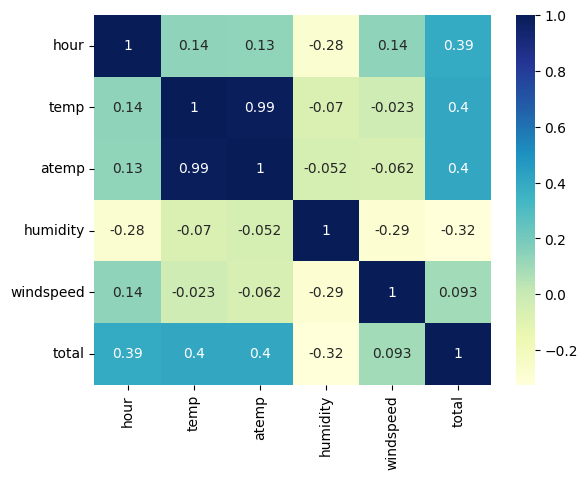

In [21]:
heatmap_hour = sns.heatmap(hour_df.drop(['casual','registered'],axis=1).corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

Berdasarkan heatmap tersebut, **hour**, **temp**, **atemp**, dan **humidity** merupakan faktor yang **paling berpengaruh** dalam **total penyewaan sepeda perjamnya**.

#### Penyewaan sepeda berdasarkan jam

In [22]:
hour_df.groupby(by="hour").agg({'total' : 'sum'})

,total
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Berdasarkan pivot table tersebut, dapat diketahui bahwa **penyewaan sepeda terbanyak** terjadi pada **pukul 17** sebanyak **336860 sepeda** dan **paling sedikit** pada **pukul 4** sebanyak **4428 sepeda**.

#### Jumlah penyewaan sepeda berdasarkan cuaca

In [23]:
hour_df.groupby(by="weather").agg({'total' : 'sum'}).sort_values(by='total', ascending=False)

,total
weather,
Clear,2338173
Mist,795952
Light Snow/Rain,158331
Heavy Rain/Snowy,223


Berdasarkan kondisi cuaca, **sepeda paling banyak disewa** saat kondisi **cerah**, yaitu sebanyak **2338173 sepeda** dan **paling sedikit** saat kondisi **hujan deras atau bersalju** sebanyak **223 sepeda**.

### Explore day_df

#### Rangkuman parameter statistik table day_df

In [24]:
day_df.describe(include='all')

,date,season,day,weather,temp,atemp,humidity,windspeed,casual,registered,total,classify_day
count,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,fall,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work
freq,NaN,188,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


Berdasarkan informasi tersebut, **rata-rata penyewaan sepeda harian** pada tahun 2011-2012 adalah **4504.34 sepeda** dengan **standar deviasi 1937 sepeda**. **Penyewaan sepeda terbanyak dalam satu hari** adalah **8714 sepeda** dan paling sedikit adalah **22 sepeda**.

#### Tanggal dengan penyewaan sepeda terbanyak dan paling sedikit

In [25]:
day_df.groupby(by="date").agg({'total' : 'sum'}).sort_values(by='total', ascending=False)

,total
date,
2012-09-15,8714
2012-09-29,8555
2012-09-22,8395
2012-03-23,8362
2012-05-19,8294
...,...
2011-03-06,605
2011-01-26,506
2012-12-26,441


**Penyewaan sepeda terbanyak dalam satu hari** adalah 8714 sepeda, yaitu pada tanggal **15 September 2012** dan **paling sedikit** adalah 22 sepeda pada tanggal **29 Oktober 2012**.

#### Melihat jumlah penyewaan sepeda berdasarkan musim

In [26]:
day_df.groupby(by="season").agg({'total' : 'sum'}).sort_values(by='total', ascending=False)

,total
season,
fall,1061129
summer,918589
winter,841613
spring,471348


Berdasarkan musim, **sepeda paling banyak disewa** pada **musim gugur** dan **paling sedikit** saat **musim semi**.

#### Perbandingan penyewaan sepeda pada hari kerja dan hari libur

In [27]:
day_df.groupby(by="classify_day").agg({
    'casual' : 'sum',
    "registered" : 'sum',
    'total' : 'sum'
}).reset_index()

,classify_day,casual,registered,total
0,off,316732,683537,1000269
1,work,303285,1989125,2292410


**Penyewaan sepeda tertinggi** terjadi pada **saat hari kerja**. Pelaku penyewaan sepeda didominasi oleh penyewa yang telah terdaftar pada sistem *bike sharing* baik pada hari kerja ataupun hari libur dan weekend. Adapun penyewaan sepeda secara insidental lebih sering dilakukan pada saat hari libur dan weekend.

**Insight:**
- Rata-rata jumlah sepeda yang disewakan per jamnya pada tahun 2011-2012 adalah 189.46 sepeda dengan standar deviasi 181.38 sepeda.
- Jam penyewaan, suhu, dan kelembapan merupakan faktor yang paling berpengaruh dalam total penyewaan sepeda perjamnya.
- Sepeda paling banyak disewa saat kondisi cuaca cerah dan paling sedikit saat kondisi hujan deras atau bersalju.
- Rata-rata penyewaan sepeda harian pada tahun 2011 - 2012 adalah 4504.34 sepeda dengan standar deviasi 1937 sepeda.
- Penyewaan sepeda terbanyak dalam satu hari terjadi pada tanggal 15 September 2012 dan paling sedikit pada tanggal 29 Oktober 2012.
- Sepeda paling banyak disewa pada musim gugur dan paling sedikit saat musim semi.
- Penyewaan sepeda tertinggi terjadi pada saat hari kerja.
- Penyewaan sepeda secara insidental lebih sering dilakukan pada saat hari libur dan weekend.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda beberapa bulan terakhir?

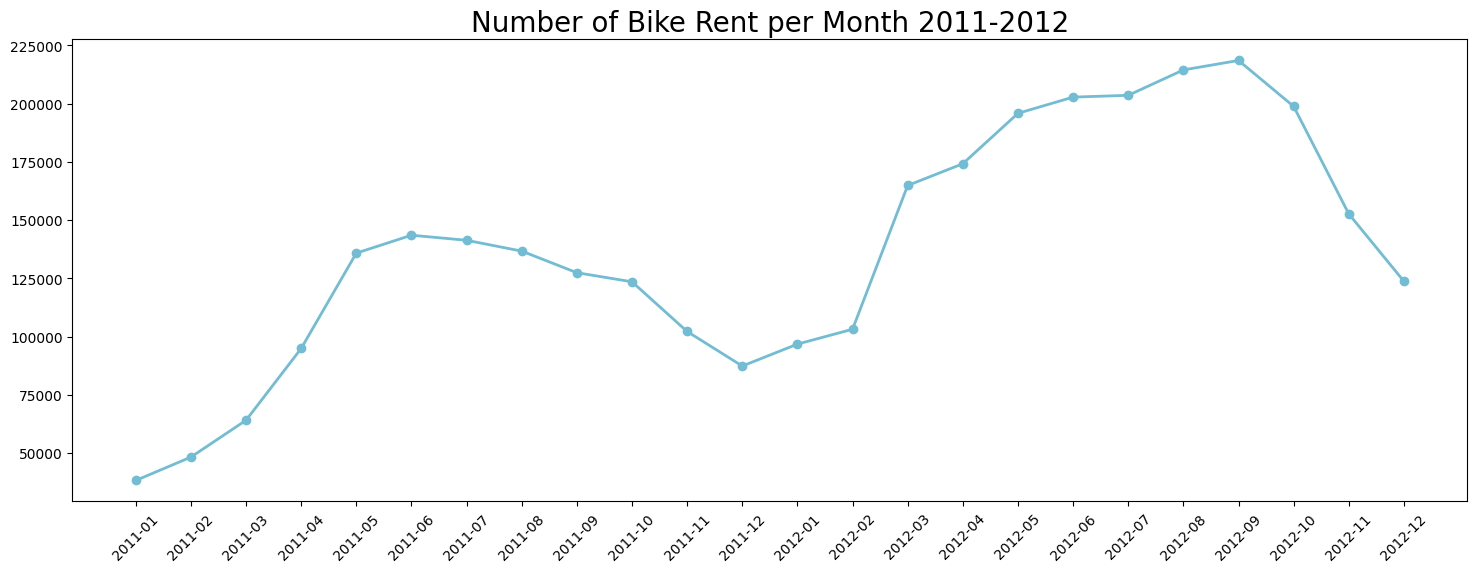

In [28]:
monthly_day_df = day_df.resample(rule='M', on='date').agg({
    "total" : "sum"
})
monthly_day_df.index = monthly_day_df.index.strftime('%Y-%m')
monthly_day_df = monthly_day_df.reset_index()
monthly_day_df

plt.figure(figsize=(18, 6))
plt.plot(monthly_day_df["date"], monthly_day_df["total"], marker="o", linewidth=2, color="#72BCD4")
plt.title("Number of Bike Rent per Month 2011-2012", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan data harian penyewaan sepeda pada periode tahun 2011-2012 setiap bulannya, jumlah **sewa sepeda terbanyak** terjadi pada bulan **September 2012**. Selain itu, terjadi **penurunan jumlah sewa sepeda** yang cukup signifikan antara bulan **Oktober 2012** dan **November 2012**.

### Pertanyaan 2: Pada jam berapa terjadi penyewaan sepeda paling banyak dan paling sedikit?

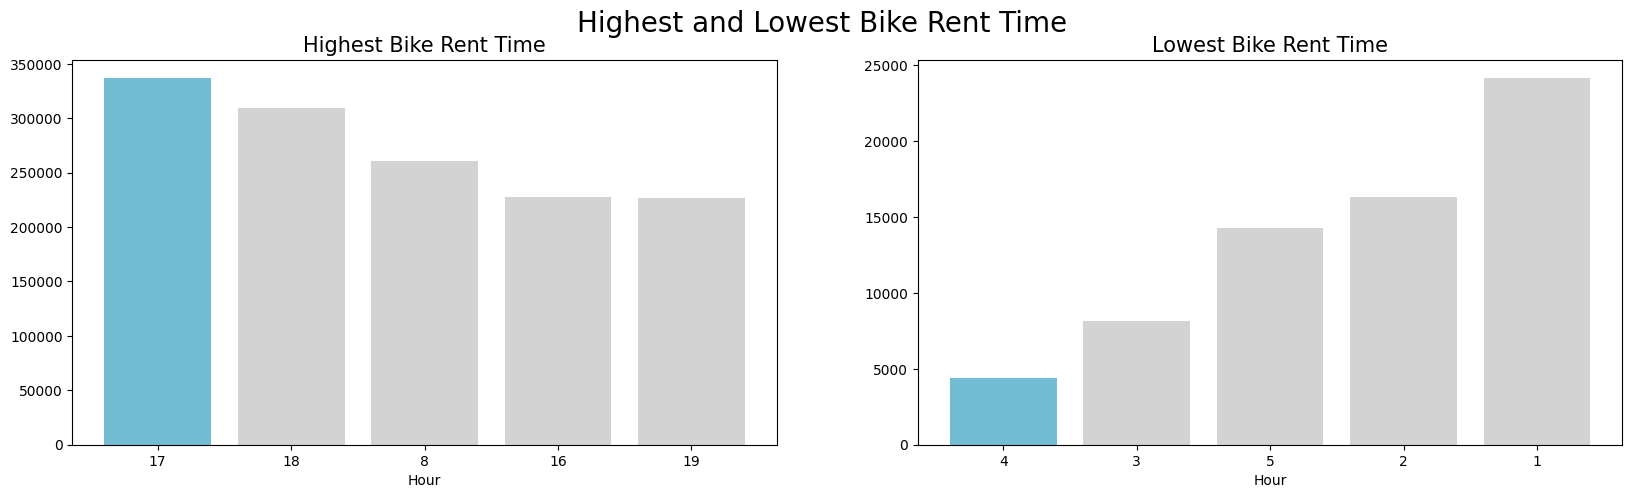

In [29]:
sum_hour_df = hour_df.groupby(by="hour").total.sum().sort_values(ascending=False).reset_index()
sum_hour_df["hour"] = sum_hour_df["hour"].map(str)
sum_hour_df

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

ax[0].bar(x=sum_hour_df.head(5)["hour"], height=sum_hour_df.head(5)["total"], color=colors)
ax[0].set_ylabel(None)
ax[0].set_xlabel('Hour')
ax[0].set_title("Highest Bike Rent Time", loc="center", fontsize=15)

ax[1].bar(x=sum_hour_df.tail(5).sort_values(by="total", ascending=True)["hour"], height=sum_hour_df.tail(5).sort_values(by="total", ascending=True)["total"], color=colors)
ax[1].set_ylabel(None)
ax[1].set_xlabel('Hour')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right
ax[1].set_title("Lowest Bike Rent Time", loc="center", fontsize=15)

plt.suptitle("Highest and Lowest Bike Rent Time", fontsize=20)
plt.show()

Berdasarkan data penyewaan sepeda setiap jam yang terjadi pada tahun 2011-2012, **jam 17** merupakan jam dengan **jumlah penyewaan sepeda banyak** dan **jam 4** merupakan jam dengan **jumlah penyewaan sepeda paling sedikit**.

### Pertanyaan 3: Bagaimana perbandingan penyewaan sepeda pada hari kerja dan hari libur?

In [30]:
work_holiday_ratio = day_df.groupby(by="classify_day").agg({
    'casual' : 'sum',
    "registered" : 'sum',
    'total' : 'sum'
}).reset_index()

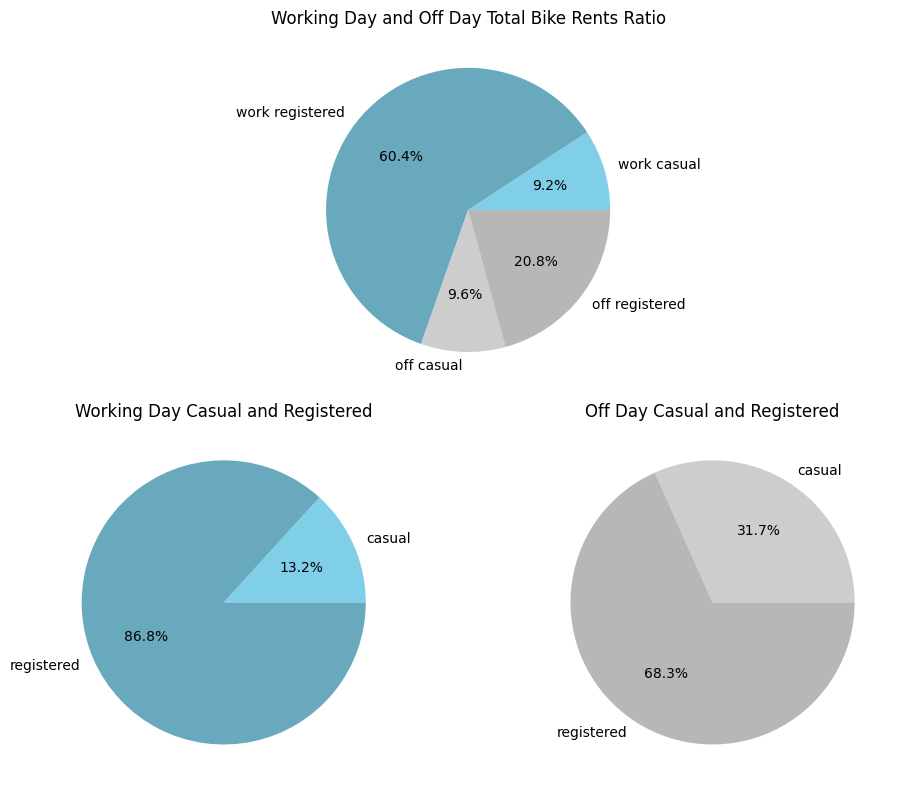

In [31]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.pie(
    x = [work_holiday_ratio[(work_holiday_ratio['classify_day']=="work")]["casual"].sum(), 
         work_holiday_ratio[(work_holiday_ratio['classify_day']=='work')]['registered'].sum(),
         work_holiday_ratio[(work_holiday_ratio['classify_day']=="off")]["casual"].sum(), 
         work_holiday_ratio[(work_holiday_ratio['classify_day']=='off')]['registered'].sum()],
    labels = ['work casual', 'work registered', 'off casual', 'off registered'],
    colors=["#80CFE8", "#69A9BE", "#CDCDCD", "#B8B7B7"], autopct='%1.1f%%')
ax1.set_title('Working Day and Off Day Total Bike Rents Ratio')

ax2 = fig.add_subplot(gs[1, 0])
ax2.pie(
    x = [work_holiday_ratio[(work_holiday_ratio['classify_day']=="work")]["casual"].sum(), 
         work_holiday_ratio[(work_holiday_ratio['classify_day']=='work')]['registered'].sum()],
    labels = ['casual', 'registered'], colors=["#80CFE8", "#69A9BE"], autopct='%1.1f%%')
ax2.set_title('Working Day Casual and Registered')

ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(
    x = [work_holiday_ratio[(work_holiday_ratio['classify_day']=="off")]["casual"].sum(), 
         work_holiday_ratio[(work_holiday_ratio['classify_day']=='off')]['registered'].sum()],
    labels = ['casual', 'registered'], colors=["#CDCDCD", "#B8B7B7"], autopct='%1.1f%%')
ax3.set_title('Off Day Casual and Registered')

plt.tight_layout()
plt.show()

**Penyewaan sepeda paling sering** dilakukan pada saat **hari kerja** dengan persentase penyewaan sepeda pada hari kerja yang adalah 69.6% dengan dan pada hari libur dan weekend adalah 30.4%. Pelaku penyewaan sepeda didominasi oleh penyewa yang telah terdaftar pada sistem *bike sharing* baik pada hari kerja ataupun hari libur dan weekend. Adapun penyewaan sepeda secara insidental lebih sering dilakukan pada saat hari libur dan weekend.

## Analisis Lanjutan (Opsional)

## Clustering

Salah satu variabel yang mempengaruhi banyaknya penyewaan sepeda pada jam tertentu adalah **temp**. Dengan menggunakan metode clustering, akan dianalisis bagaimana **temp** atau suhu udara mempengaruhi perilaku customer dalam menyewa sepeda.

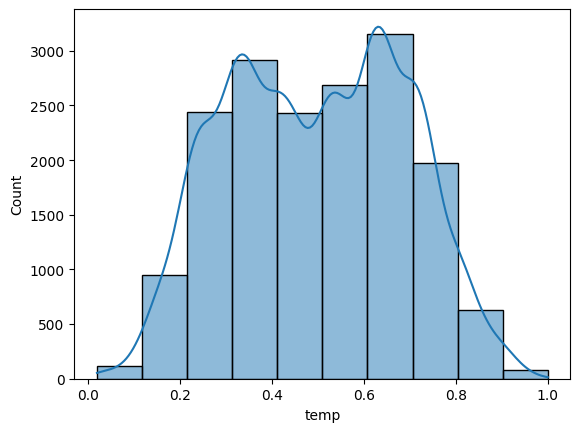

In [32]:
sns.histplot(x=hour_df['temp'], bins=10, kde=True)
plt.show()

In [33]:
hour_df['temp'] = hour_df['temp']*41 #denormalisasi temp

#Menambahkan kolom temp_interval yang berisikan interval temp berdasarkan bins
hour_df['temp_interval'] = pd.cut(hour_df['temp'], bins=10, right=False)
hour_df

,date,season,hour,day,weather,temp,atemp,humidity,windspeed,casual,registered,total,classify_day,temp_interval
0,2011-01-01,spring,0,Saturday,Clear,9.84,0.2879,0.81,0.0000,3,13,16,off,"[8.856, 12.874)"
1,2011-01-01,spring,1,Saturday,Clear,9.02,0.2727,0.80,0.0000,8,32,40,off,"[8.856, 12.874)"
2,2011-01-01,spring,2,Saturday,Clear,9.02,0.2727,0.80,0.0000,5,27,32,off,"[8.856, 12.874)"
3,2011-01-01,spring,3,Saturday,Clear,9.84,0.2879,0.75,0.0000,3,10,13,off,"[8.856, 12.874)"
4,2011-01-01,spring,4,Saturday,Clear,9.84,0.2879,0.75,0.0000,0,1,1,off,"[8.856, 12.874)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,19,Monday,Mist,10.66,0.2576,0.60,0.1642,11,108,119,work,"[8.856, 12.874)"
17375,2012-12-31,spring,20,Monday,Mist,10.66,0.2576,0.60,0.1642,8,81,89,work,"[8.856, 12.874)"
17376,2012-12-31,spring,21,Monday,Clear,10.66,0.2576,0.60,0.1642,7,83,90,work,"[8.856, 12.874)"
17377,2012-12-31,spring,22,Monday,Clear,10.66,0.2727,0.56,0.1343,13,48,61,work,"[8.856, 12.874)"


In [34]:
# Menghitung rata-rata penyewaan sepeda berdasarkan temp_interval
print("Bike Rent based on Temperature Interval")
rent_temp = hour_df.groupby(by='temp_interval').agg({'total' : 'sum'}).reset_index()
print(rent_temp)

Bike Rent based on Temperature Interval
      temp_interval   total
0     [0.82, 4.838)    4948
1    [4.838, 8.856)   64676
2   [8.856, 12.874)  226882
3  [12.874, 16.892)  432387
4   [16.892, 20.91)  427929
5   [20.91, 24.928)  568203
6  [24.928, 28.946)  709801
7  [28.946, 32.964)  626523
8  [32.964, 36.982)  206734
9   [36.982, 41.04)   24596


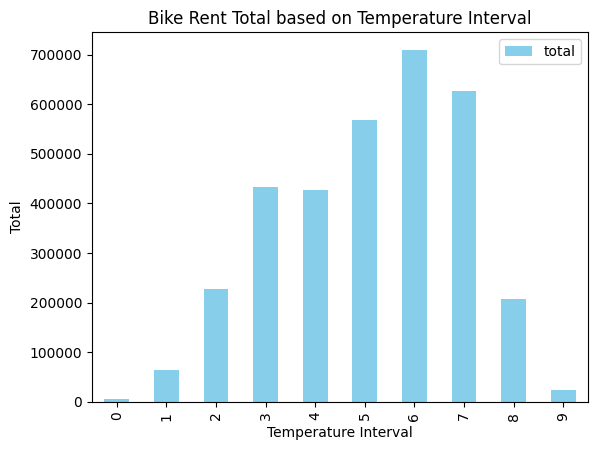

In [35]:
rent_temp.plot(kind='bar', color='skyblue')
plt.title("Bike Rent Total based on Temperature Interval")
plt.xlabel("Temperature Interval")
plt.ylabel("Total")
plt.show()

Berdasarkan hasil clustering tersebut, dapat diketahui bahwa customer cenderung menyewa sepeda pada jam tertentu jika suhu atau temperature berada pada interval 24.928 hingga 28.946.

## Conclusion

- Berdasarkan data harian penyewaan sepeda pada periode tahun 2011-2012 setiap bulannya, jumlah **sewa sepeda terbanyak** terjadi pada bulan **September 2012**. Selain itu, terjadi **penurunan jumlah sewa sepeda** yang cukup signifikan antara bulan **Oktober 2012** dan **November 2012**.
- Berdasarkan data penyewaan sepeda setiap jam yang terjadi pada tahun 2011-2012, **jam 17** merupakan jam dengan **jumlah penyewaan sepeda banyak** dan **jam 4** merupakan jam dengan **jumlah penyewaan sepeda paling sedikit**.
- **Penyewaan sepeda paling sering** dilakukan pada saat **hari kerja** dengan persentase penyewaan sepeda pada hari kerja yang adalah 69.6% dengan dan pada hari libur dan weekend adalah 30.4%. Pelaku penyewaan sepeda didominasi oleh penyewa yang telah terdaftar pada sistem *bike sharing* baik pada hari kerja ataupun hari libur dan weekend. Adapun penyewaan sepeda secara insidental lebih sering dilakukan pada saat hari libur dan weekend.
